# Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.models import FactorRange

output_notebook()
sns.set_theme()

Loading BokehJS ...

In [2]:
path = "vgsales.csv"
df = pd.read_csv(path)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Description des variables

Rank : 		Ranking of overall sales

Name :		The games name

Platform : 	Platform of the games release (i.e. PC,PS4, etc.)

Year : 		Year of the game's release

Genre : 	Genre of the game

Publisher : 	Publisher of the game

NA_Sales :	Sales in North America (in millions)

EU_Sales :	Sales in Europe (in millions)

JP_Sales : 	Sales in Japan (in millions)

Other_Sales : 	Sales in the rest of the world (in millions)

Total_Sales : 	Total worldwide sales

In [3]:
# Informations du DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Type des variables

print("Variable de type 'integer' : ", df.select_dtypes(int).columns.values)
print("Variable de type 'float' : ", df.select_dtypes(float).columns.values)
print("Variable de type 'object' : ", df.select_dtypes('O').columns.values)

# Observation : la colonne Year pourra être convertie en format Date

Variable de type 'integer' :  ['Rank']
Variable de type 'float' :  ['Year' 'NA_Sales' 'EU_Sales' 'JP_Sales' 'Other_Sales' 'Global_Sales']
Variable de type 'object' :  ['Name' 'Platform' 'Genre' 'Publisher']


# Etudes des variables

## Doublons et valeurs manquantes

In [5]:
# Recherche de doublons
df.duplicated().sum()

0

In [6]:
# Nombre et taux de NaN dans les colonnes

def taux_nan(df):
    
    "renvoit le nombre et le taux de NaN dans les colonnes d'un DataFrame"
    
    liste = []
    liste2 = []
    
    for i in range(df.shape[1]):
        
        liste.append(df[df.columns[i]].isna().sum())
        liste2.append(((df[df.columns[i]].isna().sum())*100/(len(df[df.columns[i]]))).round(2))
        
    liste = pd.Series(liste, index = df.columns)
    df_na = pd.DataFrame({'Nombre de NaN': liste, '% de NaN': liste2})
    
    return df_na

taux_nan(df)

,Nombre de NaN,% de NaN
Rank,0,0.00
Name,0,0.00
Platform,0,0.00
Year,271,1.63
Genre,0,0.00
Publisher,58,0.35
NA_Sales,0,0.00
EU_Sales,0,0.00
JP_Sales,0,0.00
Other_Sales,0,0.00


## Etendue des variables numériques

In [7]:
# Informations statistiques
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
# Recherche de différence entre la colonne Rank et l'index

(df['Rank'] - df.index).value_counts()

2    13545
3     2400
1      653
dtype: int64

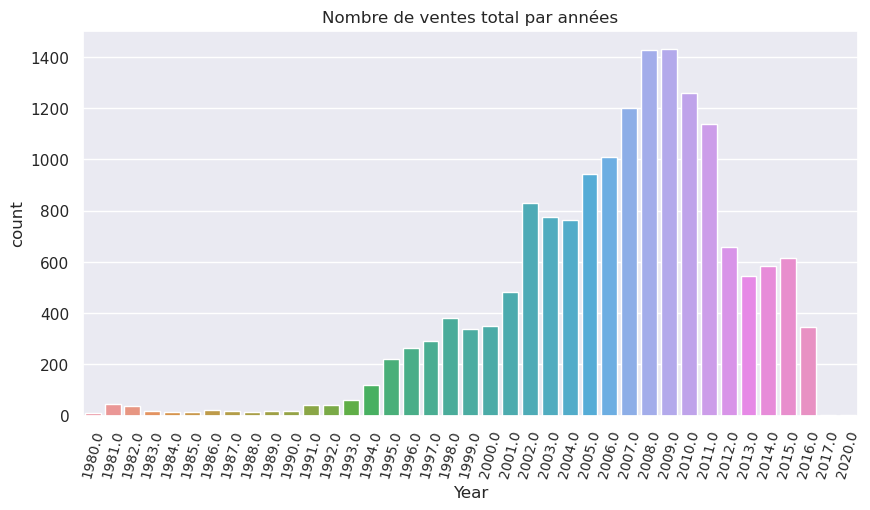

In [9]:
# Nombre de vente total par années
plt.figure(figsize = (10,5))
sns.countplot(x=df['Year'])
plt.xticks(rotation = 75, size = 10)
plt.title('Nombre de ventes total par années');

/tmp/ipykernel_31541/1265981669.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm');


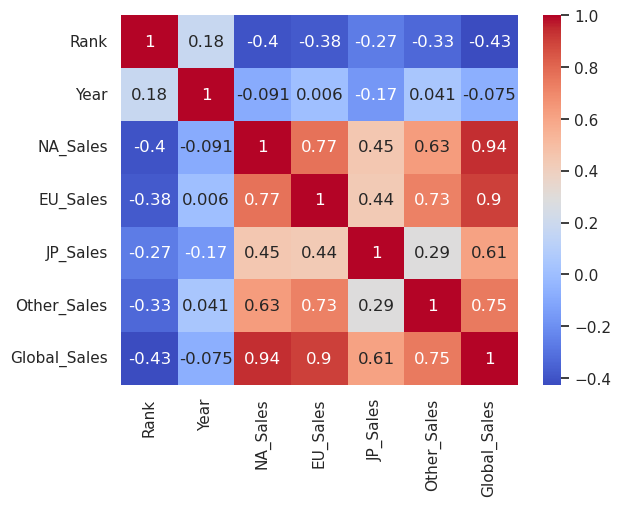

In [10]:
# HeatMap de la matrice de corrélation

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm');

In [12]:
# Visualisation de la part de chaque genre de jeu par région de vente

df_genre = df.groupby('Genre').sum()

# Création des abscisses
genre = []
for i in range(len(df_genre.index)):
    genre.append(df_genre.index[i])
    
    # renvoit une liste contenant tous les genre de jeu
    
valeur = []
for element in genre :
    valeur.append(df_genre.loc[element,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].values)
    
    # liste dont chaque ligne corespond à un genre de jeu
    # chaque ligne contient une liste avec les valeurs de ventes pour chaque continent

# Création des ordonnées
ordonnees = []
for i in valeur :
    for j in range(len(i)):
        ordonnees.append(i[j])
        
        # renvoit une liste de toutes les valeurs de ventes

conti = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

x = [(i,j) for i in conti for j in genre] # liste d'abscisses finale

# Instanciation d'un objet ColumnDataSource

source = ColumnDataSource({'x' : x , 'top' : ordonnees})

## Instanciation d'un objet FactorRange à partir de la liste d'abscisses crée

factor_range = FactorRange(factors = x)

## Intanciation d'une figure

p = figure(plot_width = 600, 
           plot_height = 400, 
           x_range = factor_range)

## Instanciation d'un graphique : diagramme à barres verticales

p.vbar(x = 'x', 
       top = 'top',
       width = 0.9, 
       source = source)         ### NE PAS OUBLIER DE RENSEIGNER LA SOURCE SINON LES CLES NE SERONT PAS RECONNUES

p.xaxis.major_label_orientation = np.pi / 4

show(p)

/tmp/ipykernel_31541/638766957.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_genre = df.groupby('Genre').sum()


## Etendue des variables catégorielles

In [13]:
# Nombre de modalités des variables catégorielles

def nombre_modalites(df):
    
    "Renvoit un DF avec en index le nom de la colonne du DF étudié et en valeur le nombre de modalités (NaN incluses)"

    liste = []
    for i in range(df.shape[1]):
        
        liste.append(len(df[df.columns[i]].unique()))
        
    df_modalites = pd.DataFrame({'Nombre de modalites (avec NaN)':liste}, index = df.columns)
    
    return df_modalites

nombre_modalites(df)

,Nombre de modalites (avec NaN)
Rank,16598
Name,11493
Platform,31
Year,40
Genre,12
Publisher,579
NA_Sales,409
EU_Sales,305
JP_Sales,244
Other_Sales,157


In [14]:
# Ensemble des modalités possibles pour les variables catégorielles

for colonne in df.select_dtypes('O').columns :
    print(df[colonne].value_counts())
    print(len(df[colonne].value_counts()))
    print('\n')
    print(50 * '-')
    print('\n')

Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: Name, Length: 11493, dtype: int64
11493


--------------------------------------------------


DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCF

In [15]:
# Affichage des 12 lignes de Need for Speed : Most Wanted

df[df['Name'] == 'Need for Speed: Most Wanted']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


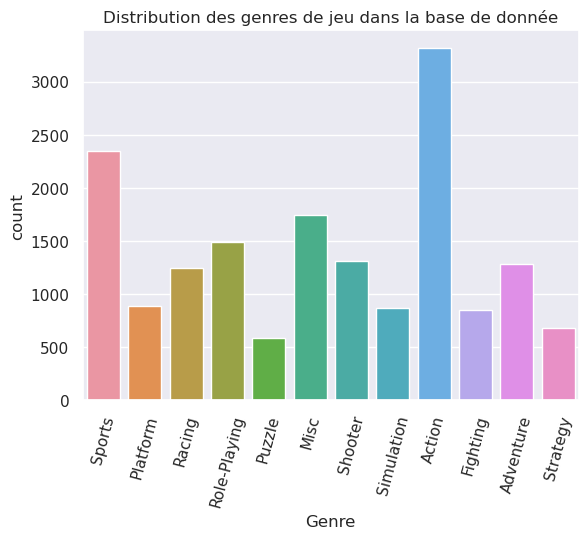

In [16]:
# Distribution des genres de jeu dans le DataFrame

sns.countplot(x = df['Genre'])
plt.xticks(rotation = 75)
plt.title('Distribution des genres de jeu dans la base de donnée');

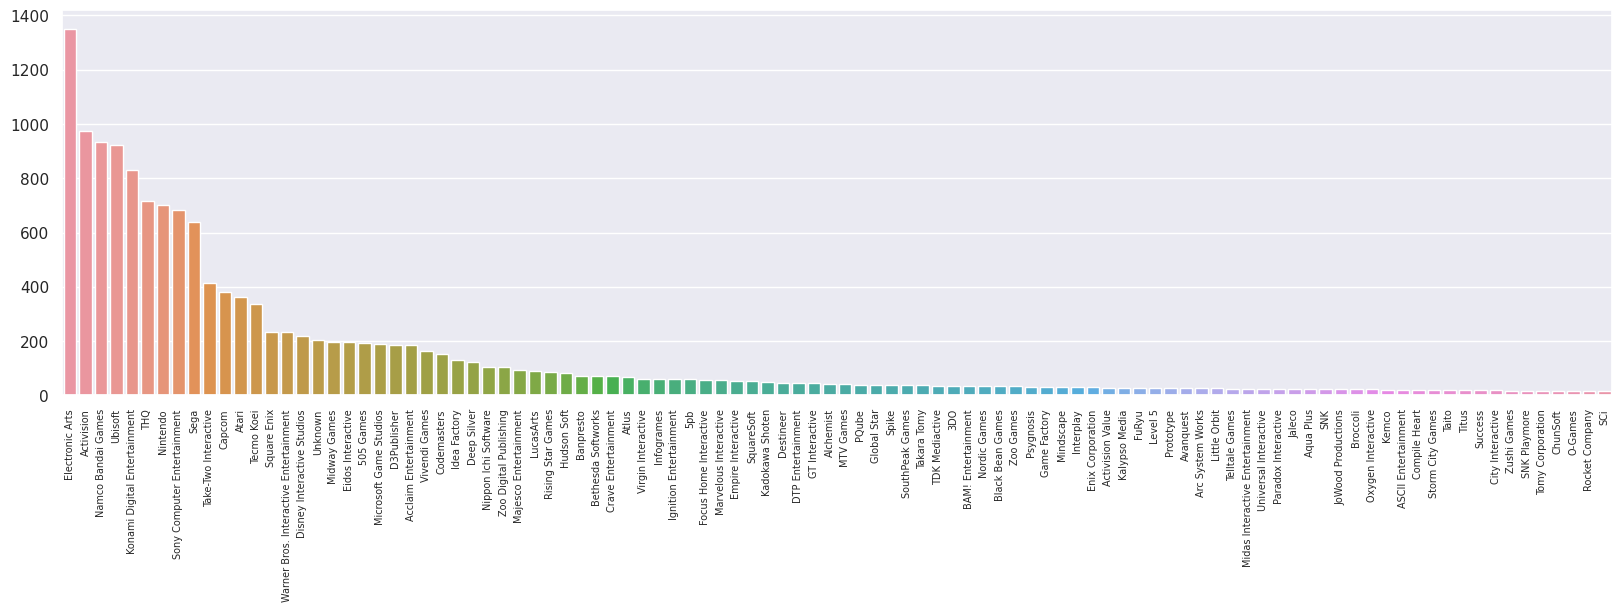

In [17]:
# Distribution des 100 modalités les plus représentées de la variable Publisher

plt.figure(figsize = (20,5))
sns.barplot(x = df['Publisher'].value_counts()[:100].index, y = df['Publisher'].value_counts()[:100].values)
plt.xticks(rotation = 90, size = 7);

# Preprocessing des données

## Gestion des NaN

In [18]:
# Définition de la fonction get_year_from_title

def get_year_from_title(title):

  """
  Fonction qui prend en argument une chaine de caractère (le titre du jeu), et qui effectue un split
  sur la chaine de caractère espace : ' '. La fonction parcourt ensuite l'ensemble des éléments splités
  et renvoit une date le cas échéant.
  Différent format de date sont pris en compte : 1987 et 87 par exemple
  """

  words = title.split(' ')                            # on scinde le titre en plusieurs élément en preant l'espace comme séparateur

  annees = [str(i) for i in range(1980, 2024, 1)]     # [1980, 1981,1982,1983... 2021, 2022,2023]
  annees_a = [str(i) for i in range(80,100,1)]        # [80,81,82,83 ... 98, 99]
  annees_b = [str(i) for i in range(0, 10, 1)]        # [0,1,2,3 ...9]
  annees_c = [str(i) for i in range(10,24,1)]         # [10,11,12... 23]

  for element in words :
    if element in annees :
      year = element                                  # renvoit toutes les années incluses dans la liste annees
    elif element in annees_a :
      year = "19" + element                           # Ex : FIFA 97 -> renvoit l'année 1997
    elif ('0'+element) in annees_b :
      year  = "200" + element                         # Ex : FIFA 08 -> 'FIFA' + '0' + str(8) -> renvoit l'année 2008
    elif element in annees_c :
      year = "20" + element                           # Ex : FIFA 11 -> renvoit l'année 2011
    else :
      year = np.nan                                   # Si aucune date n'est détectable dans le titre, on renvoit un NaN

  return year

In [19]:
# Application de la fonction get_year_from_title sur df2, copie de df

df2 = df

# Création d'une nouvelle colonne contenant les années trouvées dans les titres

df2['annee'] = df2['Name'].apply(get_year_from_title).astype(float)

# Création d'une liste en prévision de la nouvelle colonne Year

annee = list(df2['annee']) # récupération des valeurs de la colonne dans une liste
Year = list(df2['Year']) # récupération des valeurs de la colonne dans une liste
liste_annee = [i for i in range(1980, 2025,1)] # création d'une liste de toutes les années possibles dans le DF

Annee = [] # instanciation d'une liste vide en prévision de la création d'une nouvelle colonne

for i,j in zip(Year, annee):

  if i in liste_annee : # si Year est une date <=> si Year n'est pas une NaN
    Annee.append(i) # on ajoute la valeur de Year à la nouvelle liste
  else :
    Annee.append(j) # sinon on ajoute la valeur de annee : si c'est une NaN, pas de changement
                    # si c'est une date réelle, cela vient combler une NaN

df2['Year'] = Annee
df2 = df2.drop(['annee'], axis = 1)
df2.isna().sum()

Rank              0
Name              0
Platform          0
Year            254
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [20]:
df2['Year'] = df2['Year'].fillna(df2['Year'].mean()).apply(lambda x : np.round(x,0))
df2.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [21]:
# NaN dans Publisher

df2['Publisher'] = df2['Publisher'].fillna(df2['Publisher'].mode()[0])

df2.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Typage informatique de Year

In [22]:
# Typage informatique de la colonne Year

df2['Year'] = pd.to_datetime(df2['Year'])
df2['Year'] = df2['Year'].dt.year
df2['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16598 entries, 0 to 16597
Series name: Year
Non-Null Count  Dtype
--------------  -----
16598 non-null  int64
dtypes: int64(1)
memory usage: 129.8 KB


## Homogénéisation de la casse

In [23]:
# Idées : homogénéiser la casse pour les variables catégorielles

df_casse = df2

for colonne in df_casse.select_dtypes('O').columns :
    
    df_casse[colonne] = df_casse[colonne].apply(lambda x : x.upper())
    
    print(df_casse[colonne].value_counts())
    print('\n')
    print(50 * '-')
    print('\n')

NEED FOR SPEED: MOST WANTED                12
RATATOUILLE                                 9
FIFA 14                                     9
LEGO MARVEL SUPER HEROES                    9
MADDEN NFL 07                               9
                                           ..
AR TONELICO QOGA: KNELL OF AR CIEL          1
GALAGA: DESTINATION EARTH                   1
NINTENDO PRESENTS: CROSSWORD COLLECTION     1
TRACKMANIA: BUILD TO RACE                   1
KNOW HOW 2                                  1
Name: Name, Length: 11493, dtype: int64


--------------------------------------------------


DS      2163
PS2     2161
PS3     1329
WII     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XONE     213
SAT      173
WIIU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX     

## Regroupement au sein de la colonne Platform

In [24]:
# Création d'un dictionnaire pour remplacer certaine modalités par des familles de consoles

dictionnaire_plateforme = {'PCFX':'Autre','GG':'Autre','TG16':'Autre','3DO':'Autre','WS':'Autre',
                           'SCD':'Autre','NG':'Autre','GEN':'Autre','DC':'Autre','2600':'Autre','SAT':'Autre',
                           'WiiU' : 'Wii' ,'WIIU':'Wii','WII':'Wii',
                           'GBA' : 'GB',
                           'PS':'Playstation', 'PS1':'Playstation', 'PS2':'Playstation','PS3':'Playstation',
                           'PS4':'Playstation','PSP':'Playstation','PSV':'Playstation',
                           'X360':'Xbox', 'XB':'Xbox', 'XOne' : 'Xbox','XONE':'Xbox',
                           '3DS':'DS',
                           'N64':'Nintendo','SNES':'Nintendo','NES':'Nintendo','NES':'Nintendo','GC':'Nintendo'}

df3 = df2
df3['Platform'] = df3['Platform'].replace(dictionnaire_plateforme)
df3['Platform'].value_counts()

Playstation    6648
DS             2672
Xbox           2302
Wii            1468
Nintendo       1212
PC              960
GB              920
Autre           416
Name: Platform, dtype: int64

In [25]:
# Regroupement du DataFrame selon le nom du jeu, le type de platform, le genre puis le publisher

functions_to_use = {'Year' : 'mean',
                    'NA_Sales': 'sum',
                    'EU_Sales':'sum',
                    'JP_Sales':'sum',
                    'Other_Sales':'sum',
                    'Global_Sales':'sum'}

df_groupby_name = df2.groupby(['Name','Platform','Genre','Publisher']).agg(functions_to_use)
df_groupby_name = df_groupby_name.sort_values('Global_Sales', ascending = False).reset_index()
df_groupby_name['Year'] = df_groupby_name['Year'].apply(lambda x : np.round(x, 0))
df_groupby_name.head()

,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,WII SPORTS,Wii,SPORTS,NINTENDO,1970.0,41.49,29.02,3.77,8.46,82.74
1,SUPER MARIO BROS.,Nintendo,PLATFORM,NINTENDO,1970.0,29.08,3.58,6.81,0.77,40.24
2,MARIO KART WII,Wii,RACING,NINTENDO,1970.0,15.85,12.88,3.79,3.31,35.82
3,GRAND THEFT AUTO V,Playstation,ACTION,TAKE-TWO INTERACTIVE,1970.0,10.81,15.08,1.33,6.16,33.38
4,WII SPORTS RESORT,Wii,SPORTS,NINTENDO,1970.0,15.75,11.01,3.28,2.96,33.00


In [26]:
df_groupby_name[df_groupby_name['Name'] == 'NEED FOR SPEED: MOST WANTED' ]

,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
88,NEED FOR SPEED: MOST WANTED,Playstation,RACING,ELECTRONIC ARTS,1970.0,3.12,3.82,0.15,1.33,8.42
337,NEED FOR SPEED: MOST WANTED,Xbox,RACING,ELECTRONIC ARTS,1970.0,2.15,1.43,0.03,0.30,3.91
3536,NEED FOR SPEED: MOST WANTED,Nintendo,RACING,ELECTRONIC ARTS,1970.0,0.43,0.11,0.00,0.02,0.56
4773,NEED FOR SPEED: MOST WANTED,PC,RACING,ELECTRONIC ARTS,1970.0,0.02,0.29,0.00,0.07,0.38
5863,NEED FOR SPEED: MOST WANTED,Wii,RACING,ELECTRONIC ARTS,1970.0,0.14,0.12,0.00,0.02,0.28
5990,NEED FOR SPEED: MOST WANTED,DS,RACING,ELECTRONIC ARTS,1970.0,0.24,0.01,0.00,0.02,0.27
6194,NEED FOR SPEED: MOST WANTED,GB,RACING,ELECTRONIC ARTS,1970.0,0.19,0.07,0.00,0.00,0.26


In [27]:
df_groupby_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15591 entries, 0 to 15590
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          15591 non-null  object 
 1   Platform      15591 non-null  object 
 2   Genre         15591 non-null  object 
 3   Publisher     15591 non-null  object 
 4   Year          15591 non-null  float64
 5   NA_Sales      15591 non-null  float64
 6   EU_Sales      15591 non-null  float64
 7   JP_Sales      15591 non-null  float64
 8   Other_Sales   15591 non-null  float64
 9   Global_Sales  15591 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.2+ MB
